# **Desafio Cientista de Dados: Programa Lighthouse**

O desafio é claro: em um mercado cinematográfico saturado e de altíssimo risco, qual é a aposta certa? Onde devemos investir nosso próximo grande orçamento para garantir não apenas o retorno financeiro, mas também a aclamação da crítica e do público?

Para responder a essa pergunta de milhões de dólares, fomos contratados para mergulhar em um dos bancos de dados mais ricos da história do cinema: o IMDb. Nossa missão é transformar dados brutos em uma estratégia clara, utilizando a ciência de dados para decifrar o **DNA de um filme de sucesso**.

Este relatório é a nossa jornada. Através de uma Análise Exploratória de Dados (EDA), vamos desvendar os padrões, testar hipóteses e, finalmente, apresentar um caminho data-driven para a sua próxima grande produção.

**Nosso Roteiro de Análise:**

**Ato I: Preparação e Limpeza de Dados -** O trabalho de bastidores essencial para garantir que nossa análise seja construída sobre uma base sólida e confiável.

**Ato II: Análise Univariada -** Um mergulho profundo nas principais variáveis para entendermos as características individuais do sucesso: notas, faturamento, duração, gênero e os talentos envolvidos.

**Ato III: Análise Bivariada e Multivariada** - A etapa onde as conexões se revelam. Como as variáveis interagem para criar a magia do cinema aclamado?

**Ato IV: Engenharia de Atributos & Respostas Estratégicas** - Introduzimos dados externos para enriquecer nossa análise e respondemos diretamente às perguntas de negócio que guiarão a decisão da PProductions.


## **Preparando o Ambiente:**

Antes de qualquer análise, importamos as bibliotecas essenciais que nos darão o poder de manipular dados, criar visualizações e aplicar técnicas estatísticas.

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import spacy
import nltk
from nltk.util import bigrams
from collections import Counter

***Carregamos o dataset desafio_indicium_imdb.csv, que será a nossa fonte primária de informações.***

In [ ]:
# Carregando os dados

path = '/content/desafio_indicium_imdb.csv'

csv = pd.read_csv(path)

# **Ato I: Preparação e Limpeza de Dados**


Utilizamos a função **.head()** para ter um primeiro contato visual com a estrutura dos dados, entendendo as colunas e os tipos de informação que elas contêm.

In [ ]:
csv.head() # mostra as 5 primeiras linhas do dataset

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Com a função **.info()**, aprofundamos o diagnóstico. Este comando revela os tipos de dados de cada coluna e a presença de valores ausentes (NaN).

***Diagnóstico Inicial - Problemas Encontrados:***

**Tipos de Dados Incorretos:** Runtime, Gross e Released_Year estão como object (texto), o que nos impede de realizar cálculos.

**Dados Faltantes (NaN):** Certificate, Meta_score e Gross possuem valores nulos que precisam ser tratados para não comprometer a análise.

**Coluna Irrelevante:** A coluna Unnamed: 0 é um índice que veio com o dataset, mas a biblioteca pandas já apresenta esse indice, então a coluna pode ser descartada.

**Coluna Composta:** A variável Genre agrupa múltiplos gêneros em uma única string, necessitando de uma desconstrução para uma análise.

In [ ]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## **TransformandoTipos de Dados**

Removemos os caracteres "min" de Runtime e as vírgulas de Gross, e então convertemos estas colunas, juntamente com Released_Year, para o formato numérico. Isso nos permitirá realizar operações matemáticas e análises estatísticas.

In [ ]:
csv["Runtime"] = csv["Runtime"].str.replace('min', '') # Remove a palavra "min" da coluna Runtime
csv["Runtime"] = csv["Runtime"].str.strip() # Remove espaços em branco extras

csv["Gross"] = csv["Gross"].str.replace(',', '') # Remove vírgulas da coluna Gross
csv["Gross"] = csv["Gross"].str.strip() # Remove espaços em branco extras

csv["Runtime"] = pd.to_numeric(csv["Runtime"], errors="coerce") # Converte a coluna Runtime para valores numéricos e se der algum erro retorna n/a
csv["Gross"] = pd.to_numeric(csv["Gross"], errors="coerce") # Converte a coluna Gross para valores numéricos (tratando erros da mesma forma)
csv["Released_Year"] = pd.to_numeric(csv["Released_Year"], errors="coerce") # Converte a coluna Released_Year para valores numéricos (tratando erros da mesma forma)


csv # mostra o dataframe

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,998,Lifeboat,1944.0,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
csv.info() # verificando se o Dtype foi transformado corretamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory usage: 125.0+ KB


## **Tratando os Valores Ausentes (NaN)**

Nossa abordagem para preenchê-los varia conforme a natureza da variável.

**Certificate: Criando uma nova categoria**

Para a coluna Certificate (classificação etária), preencher com a moda (o valor mais comum) seria um "chute" sem fundamento. A decisão mais prudente e honesta é criar uma nova categoria, "Não classificado", para reconhecer que esta informação simplesmente não estava disponível para certos filmes.

**Meta_score e Gross: Uma Abordagem com KNNImputer**

Para as variáveis numéricas Meta_score e Gross, poderíamos usar a média ou a mediana, mas isso ignoraria as características únicas de cada filme. Optamos por uma técnica mais sofisticada: **KNNImputer**.

Esta abordagem "olha" para os 5 filmes mais similares (vizinhos mais próximos) a um filme com dado faltante e usa os valores deles para imputar um valor lógico e contextualizado. Para garantir que a similaridade seja calculada de forma justa, primeiro padronizamos (escalonamos) os dados para que variáveis com escalas diferentes (como faturamento e notas) tenham o mesmo peso.

In [ ]:
csv["Certificate"] = csv["Certificate"].fillna("Não classificado") # preenche os n/a da coluna Certificate com "Não classificado"
csv.drop('Unnamed: 0', axis=1, inplace=True) # remove a coluna 'Unnamed: 0' (inutil para a analise)

csv # verificando o dataframe

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,Lifeboat,1944.0,Não classificado,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
numeric_csv = csv.select_dtypes(include=np.number) # Seleciona apenas as colunas numéricas
numeric_columns = numeric_csv.columns # Guarda os nomes das colunas numéricas em uma variavel

scaler = StandardScaler() # Função para escalonar os valores de dados

scaled_numeric_csv = pd.DataFrame(scaler.fit_transform(numeric_csv), columns=numeric_columns) #  Aplica a padronização e cria um novo DataFrame

imputer = KNNImputer(n_neighbors=5) # Imputador KNN que usará 5 vizinhos para preencher valores ausentes (NaN)

imputer_scaled = imputer.fit_transform(scaled_numeric_csv) # Aplica o imputador nos dados escalados

inverse_scaled = scaler.inverse_transform(imputer_scaled) # retorna os dados para a escala original

csv_imputed = pd.DataFrame(inverse_scaled, columns=numeric_columns) # cria um novo DataFrame com os valores imputados e nas escalas originais

csv_imputed # Exibe o DF com valores n/a preenchidos

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1972.0,175.0,9.2,100.0,1620367.0,134966411.0
1,2008.0,152.0,9.0,84.0,2303232.0,534858444.0
2,1974.0,202.0,9.0,90.0,1129952.0,57300000.0
3,1957.0,96.0,9.0,96.0,689845.0,4360000.0
4,2003.0,201.0,8.9,94.0,1642758.0,377845905.0
...,...,...,...,...,...,...
994,1961.0,115.0,7.6,76.0,166544.0,16678994.0
995,1956.0,201.0,7.6,84.0,34075.0,51268000.0
996,1953.0,118.0,7.6,85.0,43374.0,30500000.0
997,1944.0,97.0,7.6,78.0,26471.0,6296622.2


In [ ]:
csv.update(csv_imputed) # atualiza o DataFrame original

csv # verifica o Df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,16678994.0
995,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,51268000.0
996,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,Lifeboat,1944.0,Não classificado,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6296622.2


## **Desconstruindo o Gênero**

Para analisar o impacto de cada gênero individualmente, transformamos esta coluna em uma matriz dummy: um conjunto de novas colunas onde cada uma representa um gênero único, e os valores (1 ou 0) indicam se o filme pertence ou não àquele gênero.

In [ ]:
dummies = csv['Genre'].str.get_dummies(sep=', ') # Cria variáveis dummies a partir da coluna "Genr

dummies # exibe o Df dummies

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
csv = pd.concat([csv, dummies], axis=1) # junta o dataframe original com o dummies da variavel Genre
csv.drop('Genre', axis=1, inplace=True) # remove a coluna "Genre"

csv # verifica o Dataframe original

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972.0,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008.0,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974.0,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957.0,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,115,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,...,0,0,0,0,1,0,0,0,0,0
995,Giant,1956.0,G,201,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,...,0,0,0,0,0,0,0,0,0,1
996,From Here to Eternity,1953.0,Passed,118,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,...,0,0,0,0,1,0,0,0,1,0
997,Lifeboat,1944.0,Não classificado,97,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,...,0,0,0,0,0,0,0,0,1,0


# **Ato II: Análise Univariada**

Com os dados limpos e estruturados, iniciamos a exploração de cada variável individualmente.

## **Analisando a variavel IMDB_Rating**

Começamos pela métrica mais democrática: a nota do público no IMDb.

**Insights e Hipóteses:**

**Concentração:** As notas estão em um intervalo muito alto e restrito (7.6 até 9.2, com uma média de 7.94) Isso revela um forte viés de sobrevivência, mas como nosso dataset não representa o universo de todos os filmes, mas sim os 1000 melhores filmes do IMDb, ja era algo esperado.

**Hierarquia Clara:** O histograma, com sua assimetria à direita, mostra que mesmo entre os melhores, há uma hierarquia. A maioria se agrupa em torno da nota 7.9 (segundo quartil, 50%) e filmes com notas acima de 8.5 são raros. Para a PProductions, mirar em um filme que atinja a marca de 8.2 (acima do terceiro quartil, 75%) já seria um sucesso notável.

In [ ]:
 estatisticas_imdb = csv['IMDB_Rating'].describe() # Calcula estatísticas descritivas da coluna

 print(estatisticas_imdb) # exibe as estatísticas

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64


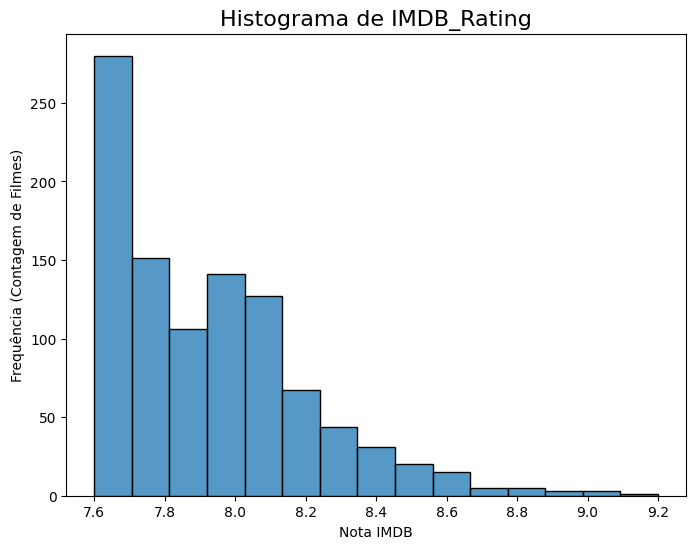

In [ ]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.histplot(csv['IMDB_Rating'], bins=15) # Cria um histograma
plt.title('Histograma de IMDB_Rating', fontsize=16) # Define o título
plt.xlabel('Nota IMDB') # Define o rótulo do eixo X
plt.ylabel('Frequência (Contagem de Filmes)') # Define o rótulo do eixo Y
plt.show() # Exibe o grafico

## **Analisando a variavel Gross**

Analisamos agora o faturamento, o indicador mais direto de sucesso comercial.

**Insights e Hipóteses:**

**Outliers:** A média de faturamento (\$68M) é maior que a mediana (\$23M). Isso mosque que um pequeno número de filmes com arrecadação astronômica puxa a média para cima, dominando o mercado.

**Viés de Dados:** É crucial notar uma limitação: os dados de Gross referem-se, em sua maioria, ao faturamento doméstico nos EUA. Isso cria um viés natural a favor de filmes americanos. Para uma análise global, dados de bilheteria internacional seriam um acréscimo valioso.

**Distribuição Logarítmica:** A visualização em escala logarítmica nos permite ver a distribuição de forma mais clara, mostrando que a maioria dos filmes aclamados gera um retorno sólido, mas apenas uma pequena parte atinge o status de fenômeno de bilheteria.

In [ ]:
estatisticas_gross = csv['Gross'].describe() # Calcula estatísticas descritivas da coluna

print(estatisticas_gross) # Exibe as estatísticas

count    9.990000e+02
mean     5.873921e+07
std      1.023596e+08
min      1.305000e+03
25%      3.323256e+06
50%      1.667899e+07
75%      6.262001e+07
max      9.366622e+08
Name: Gross, dtype: float64


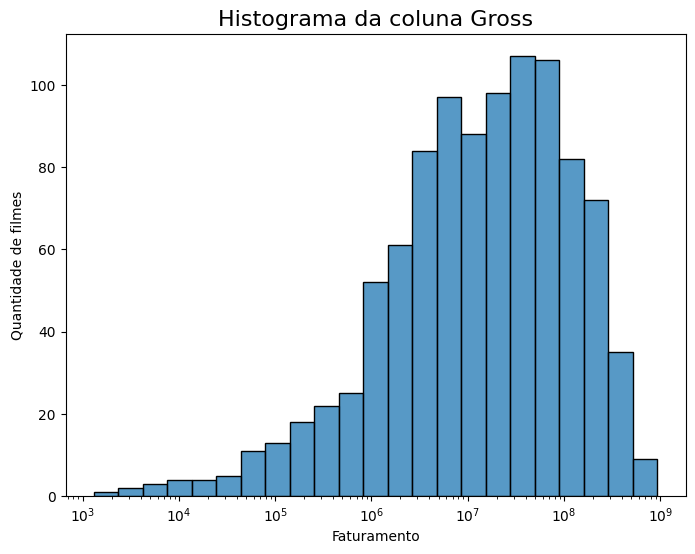

In [ ]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.histplot(csv['Gross'], log_scale=True) # Cria um histograma
plt.title('Histograma da coluna Gross', fontsize=16) # Define o título
plt.xlabel('Faturamento') # Define o rótulo do eixo X
plt.ylabel('Quantidade de filmes')  # Define o rótulo do eixo Y
plt.show() # Exibe o grafico

## **Analisando a variavel Meta_score**

O Meta_score representa a média ponderada das críticas profissionais. Como ela se compara à opinião do público?

**Insights e Hipóteses:**

**Críticos Mais Criteriosos:** A distribuição tem uma assimetria à esquerda, com a maioria das notas concentrada no topo (70-90). No entanto, a presença de notas bem mais baixas (outliers) sugere que os críticos são, em geral, mais rigorosos e polarizados que o público. Um filme pode ser amado pela audiência e ainda assim não agradar a crítica especializada, e vice-versa.

In [ ]:
estatisticas_ms = csv['Meta_score'].describe() # Calcula estatísticas descritivas da coluna

print(estatisticas_ms) # Exibe as estatísticas

count    999.000000
mean      78.538338
std       11.933085
min       28.000000
25%       71.700000
50%       79.200000
75%       87.200000
max      100.000000
Name: Meta_score, dtype: float64


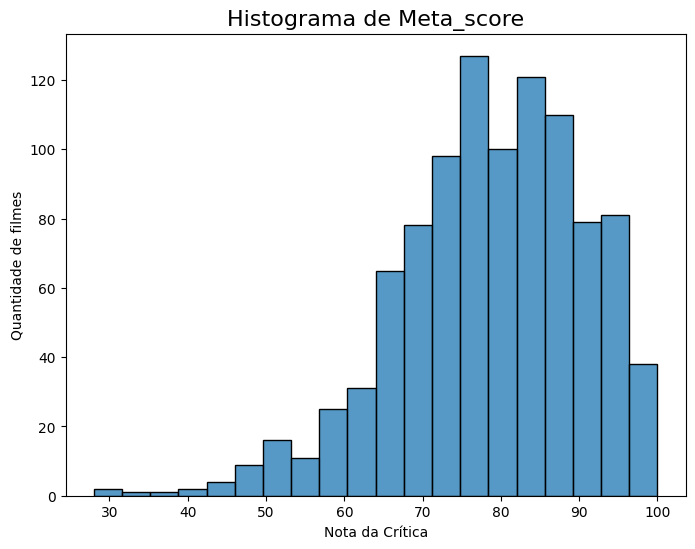

In [ ]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.histplot(csv['Meta_score'], bins=20) # Cria um histograma
plt.title('Histograma de Meta_score', fontsize=16)  # Define o título
plt.xlabel('Nota da Crítica') # Define o rótulo do eixo X
plt.ylabel('Quantidade de filmes')  # Define o rótulo do eixo Y
plt.show() # Exibe o grafico

## **Analisando a variavel Released_Year (p/ década)**

Analisamos a distribuição dos filmes ao longo das décadas para entender se existe uma "era de ouro" do cinema aclamado.

**Insights e Hipóteses:**

**Viés de Recência**: O gráfico mostra um aumento no número de filmes a partir da década de 1990. Isso não significa que os filmes de hoje são melhores, mas aponta para três fatores:

**Volume:** A produção cinematográfica global aumentou massivamente.

**Acessibilidade:** Com a internet, o público tem mais acesso e voz para avaliar filmes.

**Memória:** Filmes mais recentes estão mais frescos na memória do público votantes.

**Clássicos:** A presença de filmes das décadas de 1920 a 1950, destaca filmes tão icônicos que transcendem gerações.

In [ ]:
estatisticas_ry = csv['Released_Year'].describe() # Calcula estatísticas descritivas da coluna

print(estatisticas_ry) # Exibe as estatísticas

count     999.000000
mean     1991.232633
std        23.303962
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64


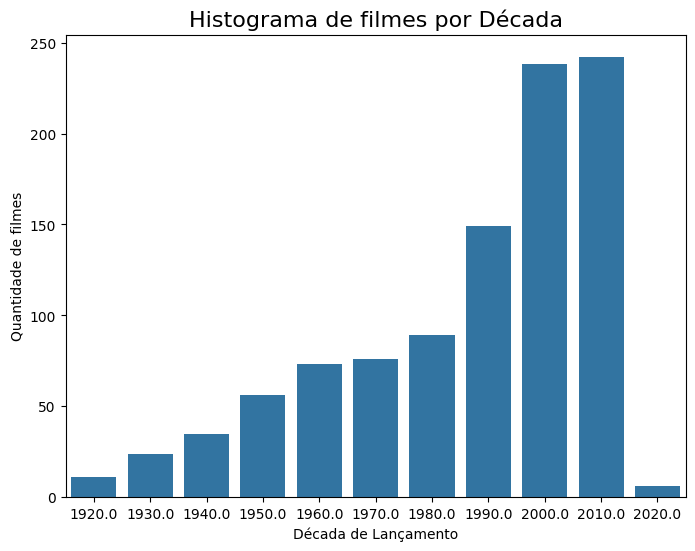

In [ ]:
csv['Decada'] = (csv['Released_Year'] // 10) * 10 # Cria uma nova coluna "Decada"

csv_sorted = csv.sort_values('Decada') # Ordena os dados

plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.countplot(x="Decada", data=csv_sorted) # Cria um gráfico de contagem

plt.title('Histograma de filmes por Década', fontsize=16)  # Define o título
plt.xlabel('Década de Lançamento') # Define o rótulo do eixo X
plt.ylabel('Quantidade de filmes')  # Define o rótulo do eixo Y
plt.show() # Exibe o grafico

## **Analisando a variavel Runtime**

Qual a duração ideal para um filme de sucesso?

**Insights e Hipóteses:**

**O Ponto Ideal de 2 Horas:** A distribuição se concentra fortemente em torno da marca de 123 minutos (2h03m). Metade dos filmes da lista está no intervalo de 103 a 137 minutos. Este parece ser o "ponto ideal", permitindo desenvolvimento de personagem sem cansar a audiência.

**Outliers:** A assimetria à direita revela a existência de filmes com mais de 3 horas que alcançaram aclamação. Para a PProductions, apostar em durações muito longas é um risco maior, mas que pode ter uma recompensa imensa se a história justificar.

In [ ]:
estatisticas_run = csv['Runtime'].describe() # Calcula estatísticas descritivas da coluna

print(estatisticas_run) # Exibe as estatísticas

count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: Runtime, dtype: float64


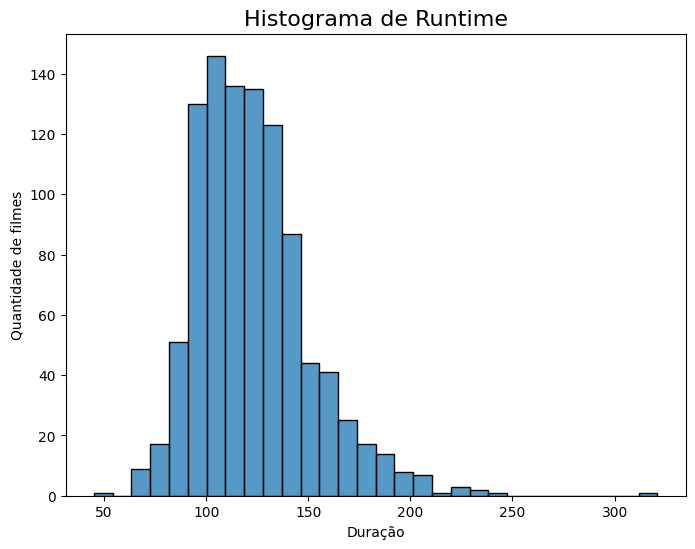

In [ ]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.histplot(csv['Runtime'], bins=30) # Cria um histograma
plt.title('Histograma de Runtime', fontsize=16)  # Define o título
plt.xlabel('Duração') # Define o rótulo do eixo X
plt.ylabel('Quantidade de filmes')  # Define o rótulo do eixo Y
plt.show() # Exibe o grafico

## **Analisando a variavel Genre**

Com a nossa matriz dummy, podemos contar a frequência de cada gênero.

**Insights e Hipóteses:**

**Dominancia do drama**: Drama está presente em quase todos os filmes, aparecendo em mais de 72% da lista.

**A Fórmula da Combinação:** Gêneros como Crime, Aventura, Comédia e Ação são  populares, mas raramente sozinhos. A hipótese principal é que, para um filme ter mais chance de sucesso, ele precisa ter um núcleo dramático,independentemente do gênero principal. Para a PProductions, pode ser um bom ponto de partida para escolher o genero do filme.

In [ ]:
colunas_genre = csv.loc[:, 'Action':'Western'] # Seleciona todas as colunas de gêneros

genre_counts = colunas_genre.sum() # Soma os valores em cada coluna

print(genre_counts) # Mostra a contagem

Action       189
Adventure    196
Animation     82
Biography    109
Comedy       233
Crime        209
Drama        723
Family        56
Fantasy       66
Film-Noir     19
History       56
Horror        32
Music         35
Musical       17
Mystery       99
Romance      125
Sci-Fi        67
Sport         19
Thriller     137
War           51
Western       20
dtype: int64


## **Analisando a variavel Director**

Será que o sucesso está atrelado a grandes nomes da direção?

**Insights e Hipóteses:**

**A Elite da Direção:** A análise revela os diretores que mais aparecem no dataset. Alfred Hitchcock (14 filmes) e Steven Spielberg (13) lideram, seguidos por Martin Scorsese, Akira Kurosawa e Christopher Nolan.

**Efeito diretor:** Esses diretores tem uma visão autoral forte e experiente e é um dos fatores mais importantes para o sucesso. Para a PProductions, a estratégia é clara: associar-se a diretores de renome ou identificar e apostar em novos talentos com uma visão artística distinta.

In [ ]:
director_counts = csv['Director'].value_counts() # Conta quantas vezes cada diretor aparece na coluna
top_15_directors = director_counts.head(15) # Mostra apenas os 15 primeiros

print(top_15_directors) # Exibe os 15 primeiros

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Billy Wilder          9
Stanley Kubrick       9
Woody Allen           9
Clint Eastwood        8
David Fincher         8
Quentin Tarantino     8
Christopher Nolan     8
Howard Hawks          7
Ingmar Bergman        7
Rob Reiner            7
Name: count, dtype: int64


## **Analisando a variavel Stars**

A análise dos atores não se limita a uma simples contagem. Foi criado um "Star Score" ponderado, atribuindo pesos diferentes se o ator é Star1 (peso 4), Star2 (peso 3).

**Insights e Hipóteses:**

**Protagonistas principais:** Robert De Niro e Tom Hanks lideram , provando seu status.

**Coadjuvante:** A métrica também revela a importância crucial de atores como Christian Bale, Matt Damon e Brad Pitt, pois seus scores altos vêm de uma mistura entre papéis principais e coadjuvantes.

**Importancia do elenco:** A lição para a PProductions é dupla:

Escolher um protagonista renomado é uma estratégia sólida.

mas também é importante construir um elenco de apoio, com atores que consistentemente elevam a qualidade das produções em que participam.

In [ ]:
counts_star1 = csv['Star1'].value_counts() # Conta quantas vezes cada ator aparece em Star1
counts_star2 = csv['Star2'].value_counts() # Conta quantas vezes cada ator aparece em Star2
counts_star3 = csv['Star3'].value_counts() # Conta quantas vezes cada ator aparece em Star3
counts_star4 = csv['Star4'].value_counts() # Conta quantas vezes cada ator aparece em Star4

csv_stars = pd.concat([counts_star1, counts_star2, counts_star3, counts_star4], axis=1) # Junta todas as contagens em um único DataFrame
csv_stars.columns = ['Star1_count', 'Star2_count', 'Star3_count', 'Star4_count'] # Renomeia as colunas
csv_stars.fillna(0, inplace=True) # Substitui valores NaN (por 0)

csv_stars['Star1_ponderado'] = csv_stars['Star1_count'] * 4 # Cria colunas ponderadas
csv_stars['Star2_ponderado'] = csv_stars['Star2_count'] * 3 # Cria colunas ponderadas
csv_stars['Star3_ponderado'] = csv_stars['Star3_count'] * 2 # Cria colunas ponderadas
csv_stars['Star4_ponderado'] = csv_stars['Star4_count'] * 1 # Cria colunas ponderadas

csv_stars['Star_score'] = csv_stars[['Star1_ponderado', 'Star2_ponderado', 'Star3_ponderado', 'Star4_ponderado']].sum(axis=1) # Calcula o score total de cada ator somando as colnas

csv_stars_sorted =csv_stars.sort_values(by='Star_score', ascending=False) # Ordena os atores pelo score

print(csv_stars_sorted[['Star1_count', 'Star2_count', 'Star3_count', 'Star4_count', 'Star_score']].head(15).astype(int)) # Exibe as 15 maiores pontuações


                   Star1_count  Star2_count  Star3_count  Star4_count  \
Robert De Niro              11            3            3            0   
Tom Hanks                   12            1            1            0   
Al Pacino                   10            3            0            0   
Clint Eastwood              10            2            0            0   
Christian Bale               8            3            0            0   
Leonardo DiCaprio            9            1            1            0   
James Stewart                8            1            1            0   
Humphrey Bogart              9            0            0            0   
Johnny Depp                  8            1            0            0   
Denzel Washington            7            2            0            0   
Matt Damon                   4            5            1            1   
Brad Pitt                    4            4            2            2   
Ethan Hawke                  5            2        

## **Analisando a variavel Certificate**

A classificação etária influencia o sucesso de um filme?

**Insights e Hipóteses:**

**Temas adultos dominam:** As classificações mais comuns são U (Universal), A (Adulto) e R (Restrito). A baixa presença de filmes com classificação estritamente familiar/infantil (como G) é notável.

**Estratégia de audiência:** Isso sugere que os temas explorados nos filmes tendem a ser mais maduros. O estúdio não deve ter receio de apostar em historias que mirem um público mais adulto.



In [ ]:
Certificate_counts = csv['Certificate'].value_counts() # Conta quantas vezes cada valor aparece na coluna
top_15_Certificate  = Certificate_counts.head(15) # Seleciona apenas os 15 primeiros

print(top_15_Certificate) # Mostra os 15 primeiros

Certificate
U                   234
A                   196
UA                  175
R                   146
Não classificado    101
PG-13                43
PG                   37
Passed               34
G                    12
Approved             11
TV-PG                 3
GP                    2
TV-14                 1
Unrated               1
TV-MA                 1
Name: count, dtype: int64


 ## **Analisando a variavel Overview**

 Para ir além de palavras soltas, utilizamos a técnica de análise de Bigramas, que examina os pares de palavras mais comuns, usando **Processamento de Linguagem Natural (PLN)**, também transformamos os bigramas em colunas numéricas, revelando os bigramas que mais interessam o público, essa mudança é importante porque poderá ser usado posteriormente para o modelo de regressão.

**Insights e Hipóteses:**

**Protagonista:** Os temas "young man" (homem jovem) e "young woman" (mulher jovem) dominam, indicando que a jornada de um protagonista é um pilar central em filmes renomados.

**Cenário:** "New York" e "Los Angeles" não são apenas cenários, mas sim ambientes icônicos que ancoram as tramas, servindo como um atalho para criar uma atmosfera reconhecível. *(lembrando que nesse dataset há um favorecimento para filmes do EUA)*

**Contexto Universal**: As narrativas frequentemente se apoiam em um drama de um grande evento, como as Guerras Mundiais ou o arco emocional de "fall love" (se apaixonar).

**PProductions**: faça uma história de uma jornada pessoal, preferencialmente de um protagonista jovem enfrentando os desafios da vida, coloque essa jornada em um contexto grandioso e de fácil identificação e adicione um arco emocional forte, como uma história de amor.

In [ ]:
try:
    nlp = spacy.load("en_core_web_sm") # Carrega o modelo de linguagem
except OSError: # se der erro
    from spacy.cli import download # Importa a função
    download("en_core_web_sm")  # Baixa o modelo de linguagem
    nlp = spacy.load("en_core_web_sm") # # Carrega o modelo


full_overview_text = " ".join(csv['Overview']) # junta todas as sinopses em um único texto


doc = nlp(full_overview_text) # Processa o texto


tokens = [] # lista vazia para armazenar os tokens

for token in doc: # laço que percorre o texto

    if token.pos_ == "VERB" and not token.is_stop and token.is_alpha: # Se o token é verbo, não é stopword e só letras
        tokens.append(token.lemma_.lower()) # Adiciona o lema

    elif not token.is_stop and token.is_alpha: # se é qualquer outra palavra (sem ser stopwords)
        tokens.append(token.text.lower()) # adiciona o token criado a lista


generated_bigrams = list(bigrams(tokens)) # gera os bigramas


bigram_counts = Counter(generated_bigrams) # conta quantas vezes cada um aparece


for bigram, count in bigram_counts.most_common(20):

    print('"' + bigram[0] + ' ' + bigram[1] + '": ' + str(count) + ' vezes') # mostra os bigramas mais comuns e a quantidade de vezes

"world war": 31 vezes
"year old": 26 vezes
"young man": 25 vezes
"war ii": 23 vezes
"fall love": 23 vezes
"new york": 22 vezes
"young boy": 15 vezes
"young woman": 15 vezes
"york city": 11 vezes
"los angeles": 11 vezes
"high school": 10 vezes
"true story": 8 vezes
"united states": 8 vezes
"small town": 8 vezes
"accuse murder": 7 vezes
"return home": 7 vezes
"small time": 7 vezes
"best friend": 6 vezes
"african american": 6 vezes
"old girl": 5 vezes


In [ ]:
top_20_bigrams = bigram_counts.most_common(20) #  Pega os 20 bigramas mais comuns


def processar_sinopse(texto_sinopse): # Define função para processar a sinopse
    doc = nlp(texto_sinopse)  # Aplica o modelo
    tokens_sinopse = [] # Cria uma lista vazia
    for token in doc: # passa um laço sobre cada token
        if token.pos_ == "VERB" and not token.is_stop and token.is_alpha: # Se o token é verbo, não é stopword e só letras
            tokens_sinopse.append(token.lemma_.lower())  # Adiciona o lema
        elif not token.is_stop and token.is_alpha: # Se é qualquer outra palavra (sem ser stopwords)
            tokens_sinopse.append(token.text.lower()) # Adiciona o token criado a lista
    return tokens_sinopse  # Retorna a lista de tokens

for bigram_info, count in top_20_bigrams: # Passa o laço sobre cada bigramas e sua contagem
    nome_coluna = 'bigrama_' + '_'.join(bigram_info) # Cria o nome da nova coluna
    nova_coluna_valores = []  # Cria uma lista vazia

    for overview in csv['Overview']: # Passa por cada sinopse no dataframe
        tokens_da_sinopse = processar_sinopse(overview) # Processa a sinopse
        bigramas_da_sinopse = list(bigrams(tokens_da_sinopse))

        if bigram_info in bigramas_da_sinopse: # Verifica se o bigrama em análise está nos bigramas da sinopse
            nova_coluna_valores.append(1) # Se sim adiciona 1
        else:
            nova_coluna_valores.append(0) # Se não adicona 0

    csv[nome_coluna] = nova_coluna_valores # Cria a nova coluna no dataframe no dataframe original

csv

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,bigrama_high_school,bigrama_true_story,bigrama_united_states,bigrama_small_town,bigrama_accuse_murder,bigrama_return_home,bigrama_small_time,bigrama_best_friend,bigrama_african_american,bigrama_old_girl
0,The Godfather,1972.0,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008.0,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974.0,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957.0,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,115,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,...,0,0,0,0,0,0,0,0,0,0
995,Giant,1956.0,G,201,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,...,0,0,0,0,0,0,0,0,0,0
996,From Here to Eternity,1953.0,Passed,118,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,...,0,0,0,0,0,0,0,0,0,0
997,Lifeboat,1944.0,Não classificado,97,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,...,0,0,0,0,0,0,0,0,0,0


# **Ato III: Análise Bivariada e Multivariada**

Neste ato, deixamos de olhar para as variáveis isoladamente e começamos a investigar como elas se relacionam.

## Análise de Correlação variaveis numericas

Começamos com uma matriz de correlação para visualizar a força e a direção da relação entre as nossas variáveis numéricas.

**Principais Correlações e Insights:**

**Gross vs. No_of_Votes (0.60):** Sucesso de bilheteria e engajamento do público andam juntas. Quanto mais gente assiste a um filme, mais gente o avalia

**IMDB_Rating vs. No_of_Votes (0.48)**: Filmes com mais votos tendem a ter notas maiores, isso pode acontecer por **3 motivos:** filmes realmente bons atraem mais atenção e consequentemente, mais votos, também pode haver um **"efeito de manada"**, onde filmes muito populares as pessoas se sentem mais inclinadas a dar notas altas, pois estão na "moda", por ultimo filmes com maior numero de votos/IMDB_rating são recomendados com mais frequencia, gerando um efeito **“bola de neve”**.

**Meta_score vs. Released_Year (-0.41):** filmes mais recentes na lista tendem a ter notas da crítica menores. Isso pode ser outro efeito do **viés de sobrevivência:** apenas os maiores clássicos antigos sobreviveram na lista, inflando a média.

**IMDB_Rating vs. Meta_score (0.26):** Debate "críticos vs. público", a correlação é positiva, mas fraca e indica uma leve concordância. Contudo, fica claro que são duas métricas distintas e um filme pode conquistar um grupo sem necessariamente agradar o outro.

**Gross vs. IMDB_Rating (0.08):** Um blockbuster pode quebrar recordes de bilheteria e ainda assim ter uma nota apenas "boa" para o público. Sucesso comercial e qualidade são objetivos diferentes. (aqui pode entrar fatores externos, como "hype" do momento e marketing)


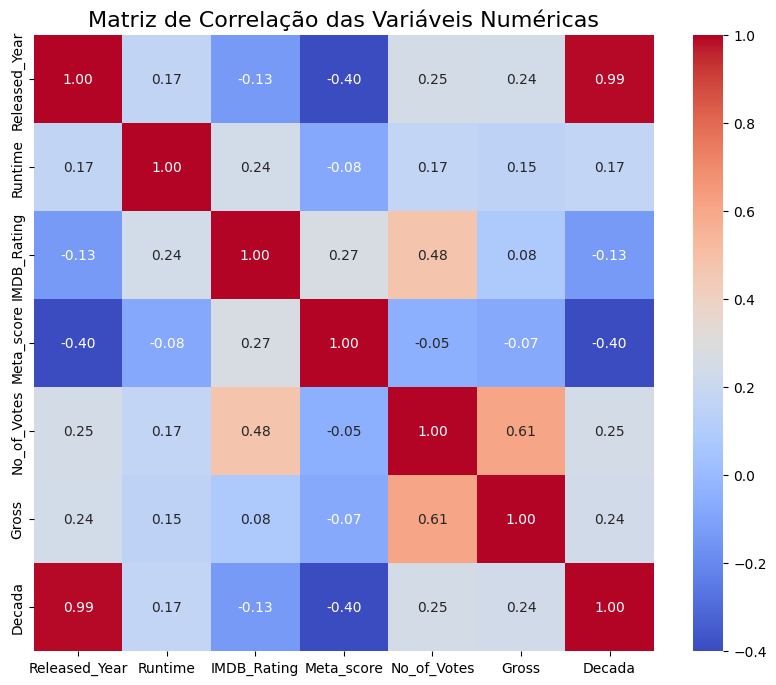

In [ ]:
numerical_cols = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', "Decada"]  # lista de colunas numéricas do dataset
numerical_df = csv[numerical_cols] # guarda em uma variavel
corr_matriz = numerical_df.corr() # calcula a matriz de correlação

plt.figure(figsize=(10, 8))  # define o tamanho da figura
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f')  # plota um heatmap da matriz de correlação
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16) # adiciona título ao gráfico
plt.show() # Mostra o grafico

## **O Impacto do Gênero no Sucesso**

Analisamos como cada gênero se sai nas três métricas de sucesso (nota do público, nota da crítica e faturamento) para identificar os caminhos mais promissores para a PProductions.

**Principais Insights:**

**Desalinhamento entre Aclamação e Bilheteria:** Gêneros de nicho e prestígio como Film-Noir e Western possuem as maiores médias de avaliação da crítica e do público, mas baixo retorno financeiro. Em contrapartida, gêneros como Adventure, Sci-Fi e Action lideram o faturamento, mas têm avaliações mais moderadas.

**Explicação:** A alta avaliação de gêneros como Film-Noir (com apenas 19 filmes na lista) é explicada por um forte **viés de sobrevivência**. Como o dataset contém 100 anos de cinema, apenas os maiores filmes desses gêneros antigos sobreviveram, inflando artificialmente suas médias de nota. O baixo faturamento médio desses gêneros hoje comprova que o prestígio dos clássicos não garante sucesso comercial para novas produções no mesmo estilo.

**Ponto de Equilíbrio:** Gêneros como Crime e Mystery representam o "ponto ideal", alcançando um forte equilíbrio entre altas avaliações (público e crítica) e um sólido desempenho de bilheteria.

**Observação:** Independentemente do gênero principal, o **Drama** é o elemento comum em mais de 72% dos filmes da lista, funcionando como a espinha dorsal para o sucesso.

(7.0, 8.0)

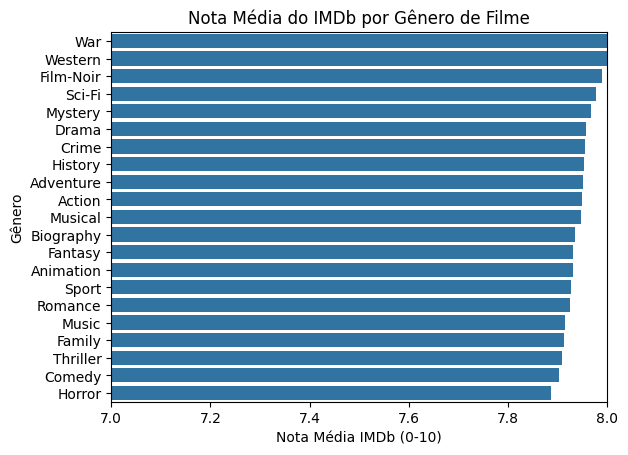

In [ ]:
genre_columns = csv.loc[:, 'Action':'Western'].columns # seleciona todas as colunas de gêneros

genre_analysis = {} # Cria um dicionário vazio


for genre in genre_columns: # laço para percorrer cada gênero da nossa lista
    movies_in_genre = csv[csv[genre] == 1] # filtra apenas os filmes que pertencem ao gênero atual

    avg_imdb_rating = movies_in_genre['IMDB_Rating'].mean() # calcula a nota média IMDb para o gênero
    avg_meta_score = movies_in_genre['Meta_score'].mean() # calcula a média do Meta_score
    avg_gross = movies_in_genre['Gross'].mean() # calcula a média da bilheteria (Gross)

    movie_count = len(movies_in_genre) # conta quantos filmes daquele gênero existem

    # Guardamos os resultados no dicionário
    genre_analysis[genre] = {
        'Count': movie_count,
        'Avg_IMDB_Rating': avg_imdb_rating,
        'Avg_Meta_score': avg_meta_score,
        'Avg_Gross': avg_gross
    }

genre_csv = pd.DataFrame.from_dict(genre_analysis, orient='index') # transforma o dicionário em DataFrame

top_imdb_genres = genre_csv.sort_values('Avg_IMDB_Rating', ascending=False)  # ordena os gêneros pela média IMDb

sns.barplot(x=top_imdb_genres['Avg_IMDB_Rating'], y=top_imdb_genres.index)  # cria gráfico de barra
plt.title('Nota Média do IMDb por Gênero de Filme') # título do gráfico
plt.xlabel('Nota Média IMDb (0-10)') # nome do eixo X
plt.ylabel('Gênero') # nome do eixo Y
plt.xlim(7, 8) # define um limite no eixo X, pois todos os filmes tem +7 de media

Text(0, 0.5, 'Gênero')

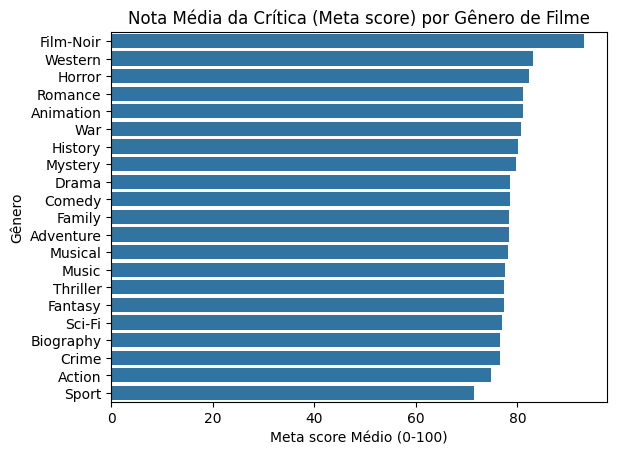

In [ ]:
top_metascore_genres = genre_csv.sort_values('Avg_Meta_score', ascending=False) # ordena os gêneros pela média do Meta score

sns.barplot(x=top_metascore_genres['Avg_Meta_score'], y=top_metascore_genres.index) # cria gráfico
plt.title('Nota Média da Crítica (Meta score) por Gênero de Filme') # título do gráfico
plt.xlabel('Meta score Médio (0-100)') # nome do eixo X
plt.ylabel('Gênero') # nome do eixo Y

Text(0, 0.5, 'Gênero')

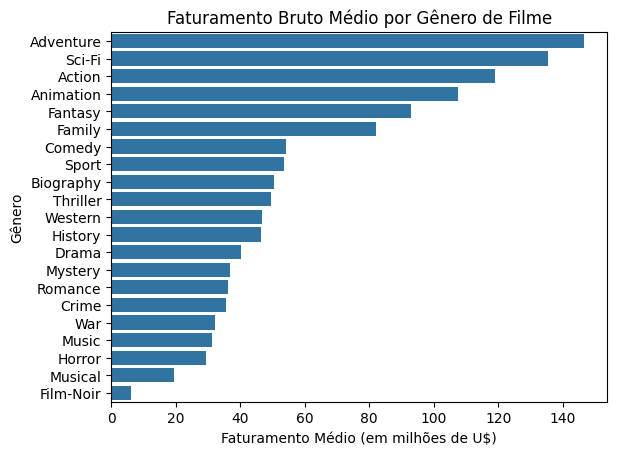

In [ ]:
top_gross_genres = genre_csv.sort_values('Avg_Gross', ascending=False) # ordena os gêneros pela média do Faturamento

sns.barplot(x=top_gross_genres['Avg_Gross'] / 1000000, y=top_gross_genres.index) # cria gráfico
plt.title('Faturamento Bruto Médio por Gênero de Filme') # título do gráfico
plt.xlabel('Faturamento Médio (em milhões de U$)') # nome do eixo X
plt.ylabel('Gênero') # nome do eixo Y

 ## **A influência de diretores e atores**

 Uma hipótese forte é que parcerias entre grandes diretores e grandes atores são um sinal de sucesso. Cruzamos as listas dos 15 melhores diretores e atores para encontrar as duplas mais frequentes em nosso dataset.

**Insights do Gráfico:**

**Parcerias iconicas:** A dupla Martin Scorsese & Robert De Niro é a mais frequente da lista, com 6 colaborações. Outras boas parcerias incluem Alfred Hitchcock & James Stewart e Christopher Nolan & Christian Bale.

**O Diretor-Protagonista:** A frequência de Clint Eastwood com ele mesmo destaca um modelo onde o diretor é também a estrela principal, garantindo controle total sobre a visão criativa.

**Implicação Estratégica:** Para a PProductions, investir em um diretor de elite a um ator de confiança com quem ele já tenha uma forte parceria parece ser uma das estratégias de menor risco e maior potencial de aclamação.






Text(0, 0.5, 'Dupla')

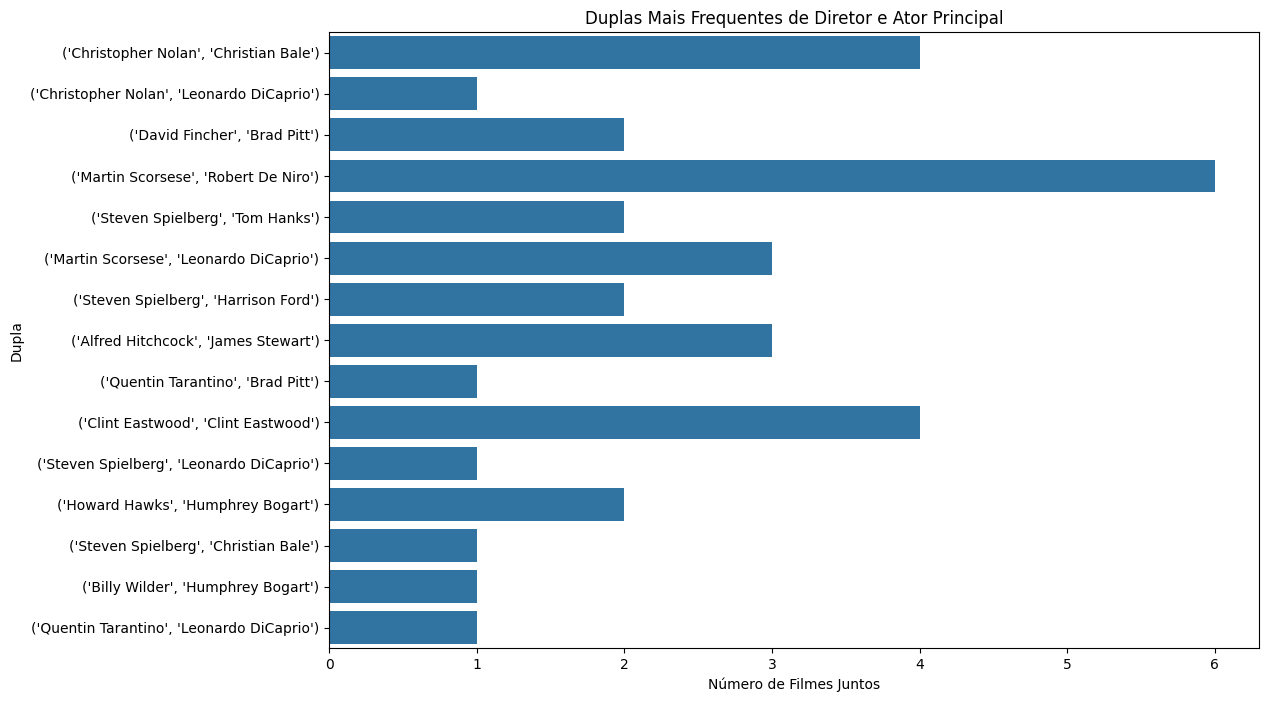

In [ ]:
top_15_actors = csv_stars_sorted.head(15).index.tolist() # pega os 15 atores mais bem ranqueados e transforma em lista

duplas_star_direc = [] # cria uma lista vazia

for index, row in csv.iterrows():
    director = row['Director'] # pega o diretor do filme
    actor = row['Star1'] # pega o ator principal

    if director in top_15_directors and actor in top_15_actors:  # verifica se o diretor e o ator está entre os 15 melhores diretores
        duplas_star_direc.append((director, actor))  # adiciona a dupla se ambos estiverem


contagem_duplas = Counter(duplas_star_direc)  # conta quantas vezes cada dupla aparece

duplas_csv = pd.DataFrame(contagem_duplas.items(), columns=['Dupla', 'Contagem']) # transforma em DataFrame

duplas_csv['Dupla'] = duplas_csv['Dupla'].astype(str)  # converte a coluna 'Dupla' para string

plt.figure(figsize=(12, 8)) # Define tamanho da figura
sns.barplot(x='Contagem', y='Dupla', data=duplas_csv) # cria gráfico de barras

plt.title('Duplas Mais Frequentes de Diretor e Ator Principal') # título do gráfico
plt.xlabel('Número de Filmes Juntos') # rótulo do eixo X
plt.ylabel('Dupla') # rótulo do eixo Y

# **Ato IV: Engenharia de Atributos & Respostas Estratégicas**

**Ajustando pela Inflação**

Uma das falhas mais comuns em qualquer análise de faturamento ao longo do tempo é não considerar a inflação. Um milhão de dólares em 1940 valia muito mais do que hoje. Para criar uma comparação justa, introduzimos dados externos: o Índice de Preços ao Consumidor (CPI) dos EUA de 1920 a 2020.

Utilizamos o ano de 2020 como base e ajustamos todos os valores de faturamento para refletir seu poder de compra naquele ano. A nova coluna, **Gross_Adjusted**, é a nossa medida mais precisa de sucesso comercial.


In [46]:
# dicionário com valores do CPI
cpi_data = {
    1920: 20.0, 1921: 17.9, 1922: 16.8, 1923: 17.1, 1924: 17.1, 1925: 17.5,
    1926: 17.7, 1927: 17.4, 1928: 17.2, 1929: 17.2, 1930: 16.7, 1931: 15.2,
    1932: 13.6, 1933: 12.9, 1934: 13.4, 1935: 13.7, 1936: 13.9, 1937: 14.4,
    1938: 14.1, 1939: 13.9, 1940: 14.0, 1941: 14.7, 1942: 16.3, 1943: 17.3,
    1944: 17.6, 1945: 18.0, 1946: 19.5, 1947: 22.3, 1948: 24.0, 1949: 23.8,
    1950: 24.1, 1951: 26.0, 1952: 26.6, 1953: 26.8, 1954: 26.9, 1955: 26.8,
    1956: 27.2, 1957: 28.1, 1958: 28.9, 1959: 29.2, 1960: 29.6, 1961: 29.9,
    1962: 30.3, 1963: 30.6, 1964: 31.0, 1965: 31.5, 1966: 32.5, 1967: 33.4,
    1968: 34.8, 1969: 36.7, 1970: 38.8, 1971: 40.5, 1972: 41.8, 1973: 44.4,
    1974: 49.3, 1975: 53.8, 1976: 56.9, 1977: 60.6, 1978: 65.2, 1979: 72.6,
    1980: 82.4, 1981: 90.9, 1982: 96.5, 1983: 99.6, 1984: 103.9, 1985: 107.6,
    1986: 109.6, 1987: 113.6, 1988: 118.3, 1989: 124.0, 1990: 130.7, 1991: 136.2,
    1992: 140.3, 1993: 144.5, 1994: 148.2, 1995: 152.4, 1996: 156.9, 1997: 160.5,
    1998: 163.0, 1999: 166.6, 2000: 172.2, 2001: 177.1, 2002: 179.9, 2003: 184.0,
    2004: 188.9, 2005: 195.3, 2006: 201.6, 2007: 207.3, 2008: 215.3, 2009: 214.5,
    2010: 218.1, 2011: 224.9, 2012: 229.6, 2013: 233.0, 2014: 236.7, 2015: 237.0,
    2016: 240.0, 2017: 245.1, 2018: 251.1, 2019: 255.7, 2020: 258.8
}

cpi_base = cpi_data[2020] # define o CPI do ano-base (2020)

def ajustar_pela_inflacao(row):
    ano = int(row['Released_Year'])  # pega o ano de lançamento do filme
    faturamento = row['Gross'] # pega a bilheteria original

    cpi_do_ano = cpi_data.get(ano) # obtém o CPI correspondente

    if cpi_do_ano: # se existir CPI para aquele ano
        fator_ajuste = cpi_base / cpi_do_ano # calcula fator de ajuste
        return faturamento * fator_ajuste # retorna o faturamento corrigido
    else:
        return faturamento # se não tiver CPI, retorna o valor original

csv['Gross_Adjusted'] = csv.apply(ajustar_pela_inflacao, axis=1) # cria nova coluna no dataset

csv.to_csv('dataset-adjusted.csv') # salva o dataset atualizado para um novo arquivo CSV
csv

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,bigrama_true_story,bigrama_united_states,bigrama_small_town,bigrama_accuse_murder,bigrama_return_home,bigrama_small_time,bigrama_best_friend,bigrama_african_american,bigrama_old_girl,Gross_Adjusted
0,The Godfather,1972.0,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,8.356294e+08
1,The Dark Knight,2008.0,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,6.429232e+08
2,The Godfather: Part II,1974.0,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,3.007959e+08
3,12 Angry Men,1957.0,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,4.015544e+07
4,The Lord of the Rings: The Return of the King,2003.0,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,5.314485e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,115,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,...,0,0,0,0,0,0,0,0,0,1.443653e+08
995,Giant,1956.0,G,201,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,...,0,0,0,0,0,0,0,0,0,4.877999e+08
996,From Here to Eternity,1953.0,Passed,118,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,...,0,0,0,0,0,0,0,0,0,2.945299e+08
997,Lifeboat,1944.0,Não classificado,97,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,...,0,0,0,0,0,0,0,0,0,9.258897e+07


## **Outras Etapas de Engenharia de Atributos Realizadas**

Além do ajuste pela inflação, que é fundamental para a análise temporal do faturamento, outras duas importantes etapas de engenharia de atributos foram realizadas anteriormente para fortalecer nosso modelo:

**Desconstrução da Variável Genre:** A coluna original Genre continha varios valores em formato de texto, mas que o modelo possa quantificar o impacto de cada gênero individualmente, ela foi transformada em uma matriz dummy. Agora, cada gênero possui sua própria coluna binária (0 ou 1).


**PLN na Coluna Overview:** Um modelo de regressão não consegue interpretar texto diretamente. Por isso, foi essencial converter os textos da coluna Overview em dados numéricos. Utilizando técnicas de PLN, o texto de cada sinopse foi processado para extrair os bigramas mais frequentes. Estes temas foram então usados para criar novas features binárias, permitindo que o modelo quantifique o impacto da história no sucesso de um filme.

Essas transformações, combinadas com a limpeza de dados e o ajuste pela inflação, nos forneceram um conjunto de atributos muito mais poderoso e significativo para a fase de modelagem preditiva.

# **Respondendo às Perguntas do Desafio**

### **1. Qual filme você recomendaria para uma pessoa que você não conhece?**

Com base na análise, a recomendação mais segura seria um filme do gênero Drama, pois é o genero que mais aparece entre os melhores filmes, mas para refinar a recomendação, o ideal seria um drama com elementos de Crime ou Biografia, pois essas combinações também aparecem com muita frequência entre os filmes de maior nota. Além disso, a presença de um diretor ou ator principal com um histórico comprovado de sucesso (como os que aparecem múltiplas vezes na lista) aumenta significativamente a chance de o filme ser bem recebido.

Portanto, a recomendação não é um título específico, mas um perfil: um filme de Drama, possivelmente com elementos de Crime, dirigido por um cineasta aclamado e com um elenco de estrelas reconhecidas.

### **2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**


**Gênero do Filme:**  a análise de faturamento mediano por gênero mostra claramente que gêneros como Animação, Aventura e Ação estão consistentemente no topo. Esses gêneros tendem a ter um apelo de mercado mais amplo, atraindo um público maior.

**Popularidade e Número de Votos:** A matriz de correlação mostrou uma forte relação positiva entre o faturamento (Gross) e o número de votos (No_of_Votes). Isso indica que o sucesso comercial está diretamente ligado ao engajamento do público. Filmes que geram mais discussão, logo com um marketing mais desenvolvido são os que mais arrecadam.

**Aclamação da Crítica e do Público (IMDB & Meta Score)**: Embora a correlação não seja tão forte quanto a do número de votos, ainda existe uma relação positiva. Boas avaliações, especialmente da crítica (Meta_score), podem gerar um interesse inicial.

**Poder dos diretores e atores:** A presença de diretores e atores de primeira linha, que já possuem um histórico de sucessos comerciais, serve como uma marca de qualidade que atrai investimentos e público, aumentando a expectativa de faturamento.

### **3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

A coluna Overview oferece insights valiosos, através da análise de texto, como a contagem de bigramas (pares de palavras), podemos extrair:

**Temas e Arquétipos Recorrentes:** A análise revela padrões e temas comuns, como "world war" (guerra mundial), "serial killer" (assassino em série) e "young man" (jovem homem). Isso nos ajuda a entender quais tipos de histórias e protagonistas são mais frequentes em filmes aclamados.

Então sim, é possível inferir o gênero do filme a partir da coluna Overview. A lógica é que cada gênero possui um vocabulário e padrões narrativos distintos. Por exemplo:

Ficção Científica: Conteria bigramas como "outer space" (espaço sideral) ou "time travel" (viagem no tempo)..

Essa tarefa pode ser estruturada como um problema de classificação de texto em machine learning, onde o texto da sinopse é usado para prever o gênero do filme. O sucesso de um modelo desses provaria a força da relação entre a narrativa e o gênero.

In [57]:
# importa as bibliotecas necessarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from google.colab import files

In [60]:
features = csv.select_dtypes(include=np.number) # seleciona apenas as colunas numéricas
features = features.drop(columns=['IMDB_Rating'], errors='ignore') # remove o alvo
target = csv['IMDB_Rating'] # define o alvo em uma variavel

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # divide os dados (80/20)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # cria o modelo

model.fit(X_train, y_train) # treina o modelo

y_pred = model.predict(X_test) # gera previsões

# cacula as metricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# exibe as metricas de desempenho
print(mae)
print(rmse)
print(r2)

# filme que queremos prever o IMDB_Rating
filme_shawshank_raw = {
    'Released_Year': '1994',
    'Runtime': '142',
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': '28341469'
}

df_shawshank = pd.DataFrame([filme_shawshank_raw]) # cria um DataFrame

df_shawshank['Drama'] = 1 # indica que o filme é de drama

colunas_do_modelo = X_train.columns # pega as colunas

df_shawshank_final = df_shawshank.reindex(columns=colunas_do_modelo, fill_value=0) # reorganiza as colunas

previsao_shawshank = model.predict(df_shawshank_final) # gera a previsão

print(previsao_shawshank) # exibe


0.15100499999999975
0.19649449101692373
0.41182613795625034
[8.747]


In [58]:
nome_arquivo = 'random_forest_imdb.pkl' # define o nome do arquivo

with open(nome_arquivo, 'wb') as file: # abre o arquivo
    pickle.dump(model, file) # salva em .pkl

files.download(nome_arquivo) # faz o download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Previsão da Nota do IMDB**

A seguir, detalhamos cada etapa do processo, explicando as decisões tomadas.

### **Qual tipo de problema estamos resolvendo (regressão, classificação)?**

Estamos resolvendo um problema de regressão. O objetivo é prever um valor numérico (IMDB_Rating), que pode assumir qualquer valor em uma escala (0 a 10).

Se diferenciando da classificação, onde o objetivo seria prever uma categoria, como por exemplo, classificar um filme como "bom" ou "ruim".

### **Quais variáveis e/ou suas transformações você utilizou e por quê?**

**Features Numéricas Principais:** Meta_score, No_of_Votes, Runtime, e Gross_Adjusted. Essas variáveis foram escolhidas por sua forte intuição preditiva. O Meta_score reflete a opinião da crítica, o No_of_Votes indica a popularidade e o engajamento do público (essencial para o IMDB_Rating), enquanto Runtime e Gross_Adjusted podem estar correlacionados com o sucesso de um filme.

**Features de Gênero:** Essa transformação (chamada one-hot encoding) é fundamental porque permite que o modelo entenda os gêneros como características independentes que podem influenciar a nota.

**Features de Texto (Bigramas):** As colunas de bigramas tiradas da coluna Overview. Elas permitem que o modelo capture padrões sutis no enredo dos filmes que podem estar associados a notas mais altas ou mais baixas.

Foram excluídas variáveis de texto com muitos valores únicos, como Director e Star1, o que é uma decisão pragmática para evitar um aumento excessivo na complexidade do modelo e o risco de overfitting.

### **Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo escolhido foi o Random Forest, uma excelente opção para este tipo de problema de dados.

***Vantagens:***

**Alta Performance:** É um modelo de ensemble, o que significa que combina as previsões de várias árvores de decisão para chegar a um resultado mais preciso do que uma única árvore conseguiria.

**Robustez a Outliers e Escala:** O Random Forest não exige que as features sejam escalonadaa e é menos sensível a outliers, o que simplifica o pré-processamento.

**Captura de Relações Não-Lineares:** Muito eficaz em identificar relações complexas e não-lineares entre as variáveis.

***Desvantagens:***

**Interpretabilidade Reduzida:** É difícil entender a lógica exata por trás de uma única previsão, ao contrário de uma Regressão Linear, onde podemos olhar os coeficientes.

**Custo Computacional:** Por treinar muitas
 árvores, ele pode ser mais lento e exigir mais memória do que modelos mais simples, especialmente em datasets muito grandes

### **Qual medida de performance do modelo foi escolhida e por quê?**

Foi três métricas de performance padrão para regressão

**MAE (Erro Absoluto Médio): 0.15**

Esta métrica representa o erro médio absoluto das previsões, escolhi pois é uma métrica muito fácil de interpretar e amplamente utilizada em modelos de Random Forest.

**RMSE (Raiz do Erro Quadrático Médio): 0.19**

Parecido com o MAE, mas é mais sensivel a outliers, pois eleva os erros ao quadrado antes de tirar a média. Foi utilizado para penalizar erros maiores.

**R² (Coeficiente de Determinação): 0.411**

Foi escolhida porque permite avaliar se o modelo realmente melhora em relação a simplesmente prever a média.

 ### **Supondo um filme com as características dadas no desafio, qual seria a nota do IMDB?:**


A nota prevista para 'The Shawshank Redemption' foi de 8.747.

Embora a nota real do filme no IMDB seja 9.3, é natural que o modelo não acerte perfeitamente um caso tão extremo. O modelo aprendeu com os padrões de centenas de outros filmes e fez uma previsão muito bem fundamentada com base nesses padrões, chegando relativamente perto de acertar a nota.

**Uma possibilidade:** O dataset só contém filmes até 2020 e pode ser o ano em que foi atualizado pela ultima vez, então o modelo pode ter previsto a nota do filme em 2020 e o valor de 9.3 é em 2025.
